## Answer 1:

##### The code given in the question does not work. The right code is

In [11]:
a = [i for i in range(1,11)]
for i in range(1,11):
    print('19 X', i, '=', 19*a[i-1])

19 X 1 = 19
19 X 2 = 38
19 X 3 = 57
19 X 4 = 76
19 X 5 = 95
19 X 6 = 114
19 X 7 = 133
19 X 8 = 152
19 X 9 = 171
19 X 10 = 190


## Answer 2:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_random_walk_2d(N, s_start, mu_theta, sigma_theta):
    """
    N : The number of steps.
    s_start : The starting coordinates (x, y).
    mu_theta : The mean of the Gaussian distribution for the angle (in radians).
    sigma_theta : The standard deviation of the Gaussian distribution for the angle (in radians).
    """
    
    # Initialize the array to store all locations (N+1 points: start + N steps)
    all_steps_locations = np.zeros((N + 1, 2))
    all_steps_locations[0] = np.array(s_start)
    
    # Current location is s_start
    current_location = np.array(s_start, dtype=float)
    
    # Generating N random angles from the Gaussian distribution
    angles = np.random.normal(loc=mu_theta, scale=sigma_theta, size=N)
    step_length = 1.0

    for i in range(N):
        theta = angles[i]
        step_x = step_length * np.cos(theta)
        step_y = step_length * np.sin(theta)
        step_vector = np.array([step_x, step_y])
        current_location += step_vector
        all_steps_locations[i+1] = current_location
    
    return all_steps_locations

N_steps = 100   
start_point = (0, 0) 
mu_angle = 0  
sigma_angle = np.pi / 4 

path = gaussian_random_walk_2d(N_steps, start_point, mu_angle, sigma_angle)
print("The final location of the walker is: ", path[-1])

The final location of the walker is:  [75.00913272 -5.26137905]


#### plot of the steps taken

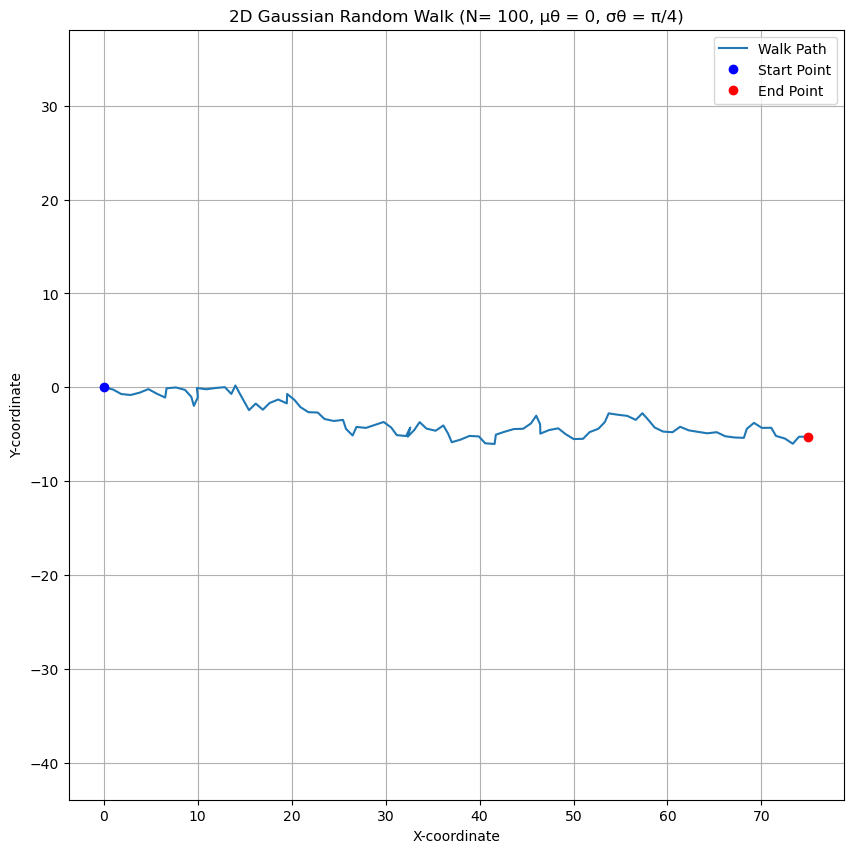

In [6]:
plt.figure(figsize=(10, 10))
plt.plot(path[:, 0], path[:, 1], label='Walk Path')
plt.plot(path[0, 0], path[0, 1], 'bo', label='Start Point')
plt.plot(path[-1, 0], path[-1, 1], 'ro', label='End Point')
plt.title("2D Gaussian Random Walk (N= 100, μθ = 0, σθ = π/4)")
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True, linestyle='-')
plt.axis('equal')
plt.show()

####  (i)  Group1: µθ = 0, σθ = π/4; Group2: µθ = 0, σθ = π

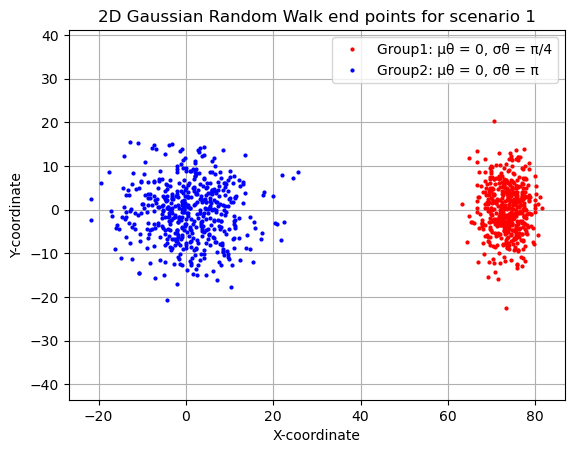

In [16]:
plot1x = np.zeros((500, 1))
plot1y = np.zeros((500, 1))
plot2x = np.zeros((500, 1))
plot2y = np.zeros((500, 1))
for j in range(500):
    plot1x[j], plot1y[j] = gaussian_random_walk_2d(100, (0, 0), 0, np.pi/4)[-1]
    plot2x[j], plot2y[j] = gaussian_random_walk_2d(100, (0, 0), 0, np.pi)[-1]

plt.figure()
plt.plot(plot1x, plot1y, 'ro', markersize=2,  label="Group1: µθ = 0, σθ = π/4")
plt.plot(plot2x, plot2y, 'bo', markersize=2, label="Group2: µθ = 0, σθ = π")
plt.title("2D Gaussian Random Walk end points for scenario 1")
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True, linestyle='-')
plt.axis('equal')
plt.show()
   

#### (ii) Group1: µθ = 0, σθ = π/4; Group2: µθ = π/4, σθ = π/4

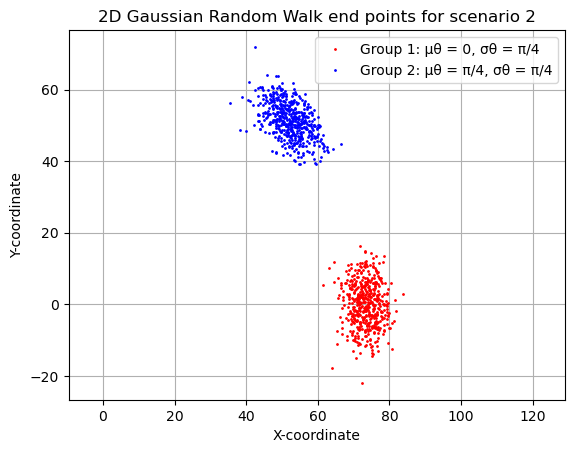

In [18]:
plot1x = np.zeros((500, 1))
plot1y = np.zeros((500, 1))
plot2x = np.zeros((500, 1))
plot2y = np.zeros((500, 1))
for j in range(500):
    plot1x[j], plot1y[j] = gaussian_random_walk_2d(100, (0, 0), 0, np.pi/4)[-1]
    plot2x[j], plot2y[j] = gaussian_random_walk_2d(100, (0, 0), np.pi/4, np.pi/4)[-1]

plt.figure()
plt.plot(plot1x, plot1y, 'ro', markersize=1,  label="Group 1: µθ = 0, σθ = π/4")
plt.plot(plot2x, plot2y, 'bo', markersize=1, label="Group 2: µθ = π/4, σθ = π/4")
plt.title("2D Gaussian Random Walk end points for scenario 2")
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True, linestyle='-')
plt.axis('equal')
plt.show()
   

#### By the multivariate central limit theorem the endpoints are approximately bivariate normal distrobution for large N.

#### Scenario A (same mean µ=0, widely different σ):
#### For σ = π/4 each step has a strong x-component bias, after 100 steps the mean displacement is large. The simulated cluster is    tightly centered far from origin.
#### For σ = π the mean step vector is almost zero, the walk is nearly isotropic and diffusive. The spread is large. This is why G2 looks like a cloud near origin.

#### Scenario B (same σ=π/4, different µ):
#### Both groups have the same concentration (same σ), so both have strong drift but Group 2’s mean direction is µ = π/4 so its cluster is centered at a 45° angle. Both groups at roughly the same spread, but their mean directions differ by 45°.


The number host stars with multiplanet system are: 1019
The list of host stars names is:  ['11 Com' '11 UMi' '14 And' ... 'ups And' 'ups Leo' 'xi Aql']
The list of host stars with multiplanet systems:  ['14 Her' '24 Sex' '2MASS J19383260+4603591' ... 'rho CrB' 'tau Cet'
 'ups And']


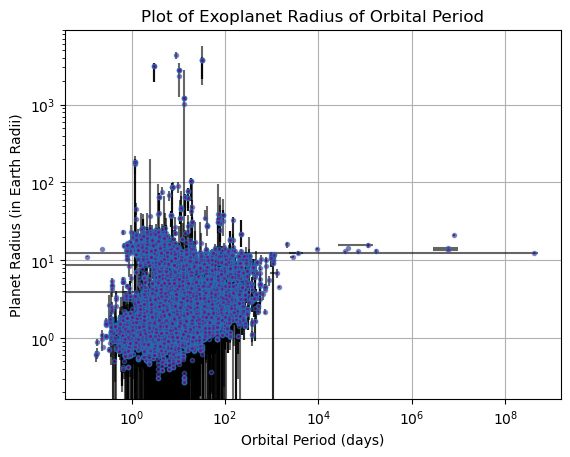

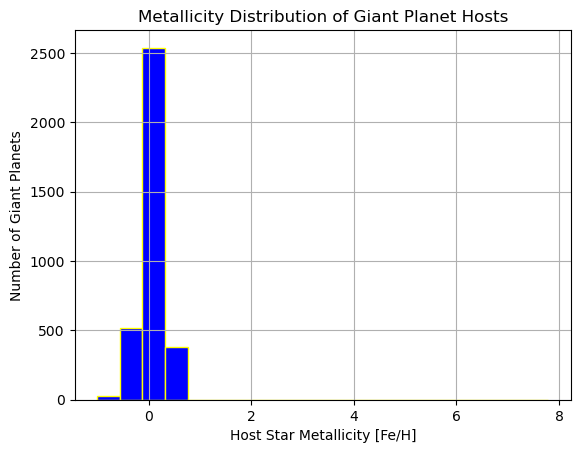

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

planet_data = pd.read_csv('planet_data.csv', skiprows = 96)

host_stars = np.array(planet_data['hostname'])
num = np.array(planet_data['sy_pnum'])
multi_planetery_host_stars_list = []
for i in range(len(host_stars)):
    if num[i] > 1:
        multi_planetery_host_stars_list.append(host_stars[i])
multi_planetery_host_stars = np.unique(np.array(multi_planetery_host_stars_list))

# Number of multi-planetary systems
print("The number host stars with multiplanet system are:", len(multi_planetery_host_stars))

# List of names of planets Host stars
print('The list of host stars names is: ', np.unique(host_stars))

# numpy array of names of multi-planetary systems host star
print('The list of host stars with multiplanet systems: ', multi_planetery_host_stars)

# Plot of Planet Radius vs Orbital Period with error bars
x_values = np.array(planet_data['pl_orbper'])
y_values = np.array(planet_data['pl_rade'])
orb_error = np.array([np.abs(planet_data['pl_orbpererr1'].fillna(0)), np.abs(planet_data['pl_orbpererr2'].fillna(0))])
rad_error = np.array([np.abs(planet_data['pl_radeerr1'].fillna(0)), np.abs(planet_data['pl_radeerr2'].fillna(0))])

plt.figure()
plt.title('Plot of Exoplanet Radius of Orbital Period')
plt.errorbar(x_values, y_values, xerr=orb_error, yerr=rad_error, fmt='o', mfc='purple', ms=3, ecolor='black', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period (days)')
plt.ylabel('Planet Radius (in Earth Radii)')
plt.grid(True)
plt.show()

# Histogram of Host Star Metallicity for Giant Planets
giants = planet_data[((planet_data['pl_bmassj'].fillna(0)>95/318) | (planet_data['pl_radj'].fillna(0)> 0.83)) & (planet_data['st_met'].notna())]
giants_met = np.array(giants['st_met'].dropna())


plt.figure()
plt.hist(giants_met, bins=20, color='blue', edgecolor='yellow')
plt.title('Metallicity Distribution of Giant Planet Hosts')
plt.xlabel('Host Star Metallicity [Fe/H]')
plt.ylabel('Number of Giant Planets')
plt.grid(True)
plt.show()

